In [1]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
appleData = pd.read_csv('apple_quality.csv') #predict if apple has good or bad quality
appleData = appleData.iloc[:1000] #have to take a sample because my decision tree is too slow :(
data = appleData.iloc[:, 1:appleData.shape[1]-1]
labels = appleData['Quality'].replace({'good': 1, 'bad':0}) #encode labels

xtrain, xtest, ytrain, ytest = train_test_split(data, labels, test_size=0.2, random_state=42)

In [3]:
class Kmean:
    def __init__(self, n_clusters, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def assign(self, data):
        distances = np.zeros((data.shape[0], self.n_clusters))

        for i, centroid in enumerate(self.centroids):
            #use cosine similarity
            dot_product = np.dot(data, centroid)
            norm_a = np.linalg.norm(data, axis=1)
            norm_b = np.linalg.norm(centroid)

            cosine_similarity = dot_product / (norm_a * norm_b)

            distances[:, i] = 1 - cosine_similarity

        labels = np.argmin(distances, axis=1)
        return labels

    def update(self, data):
        new_centroids = np.zeros((self.n_clusters, data.shape[1]))

        for i in range(self.n_clusters):
            cluster_points = data[self.labels == i]

            if len(cluster_points) > 0:
                new_centroids[i] = np.mean(cluster_points, axis=0)
            else:
                #edge case
                new_centroids[i] = data[np.random.choice(data.shape[0])]

        return new_centroids

    def fit(self, data):
        indices = np.random.choice(data.shape[0], self.n_clusters, replace=False)
        self.centroids = data.iloc[indices].values
        self.labels = np.zeros(data.shape[0])

        for i in range(self.max_iter):
            self.labels = self.assign(data)
            new_centroids = self.update(data)

            #check for convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            
            self.centroids = new_centroids

    def predict(self, data):
        return self.assign(data)

In [4]:
kmean = Kmean(n_clusters=2)
kmean.fit(xtrain)
pred = kmean.predict(xtest)

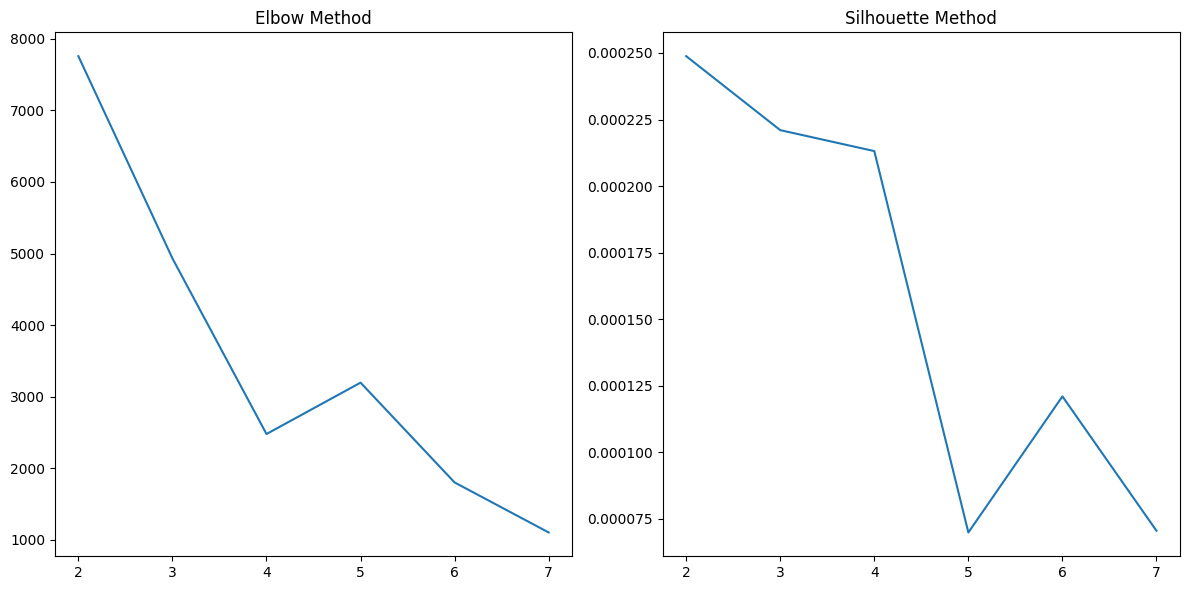

In [5]:
inertia = []
silhouette = []

for i in range(2, 8):
    temp = Kmean(n_clusters=i)
    temp.fit(xtrain)

    curr_inertia = 0

    for j in range(i):
        points = xtrain[temp.labels == j]
        centroid = temp.centroids[j]
        curr_inertia = np.sum((points - centroid) ** 2)
        
    inertia.append(np.sum(curr_inertia))

    silhouette_scores = np.zeros(xtrain.shape[0])
    
    for j in range(xtrain.shape[0]):
        point = xtrain.iloc[j]
        centroid = temp.labels[j]

        group = xtrain[temp.labels == centroid]
        a = np.mean(np.linalg.norm(group - point, axis=1))

        b = float('inf')
        for j in range(i):
            if j != centroid:
                other_points = xtrain[temp.labels == j]
                dist = np.mean(np.linalg.norm(other_points - point, axis=1))
                b = min(b, dist)
        
        silhouette_scores[i] = (b - a) / max(a, b)
        
    score = np.mean(silhouette_scores)
    silhouette.append(score)
    
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 8), inertia)
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(range(2, 8), silhouette)
plt.title('Silhouette Method')

# Show the plots
plt.tight_layout()
plt.show()

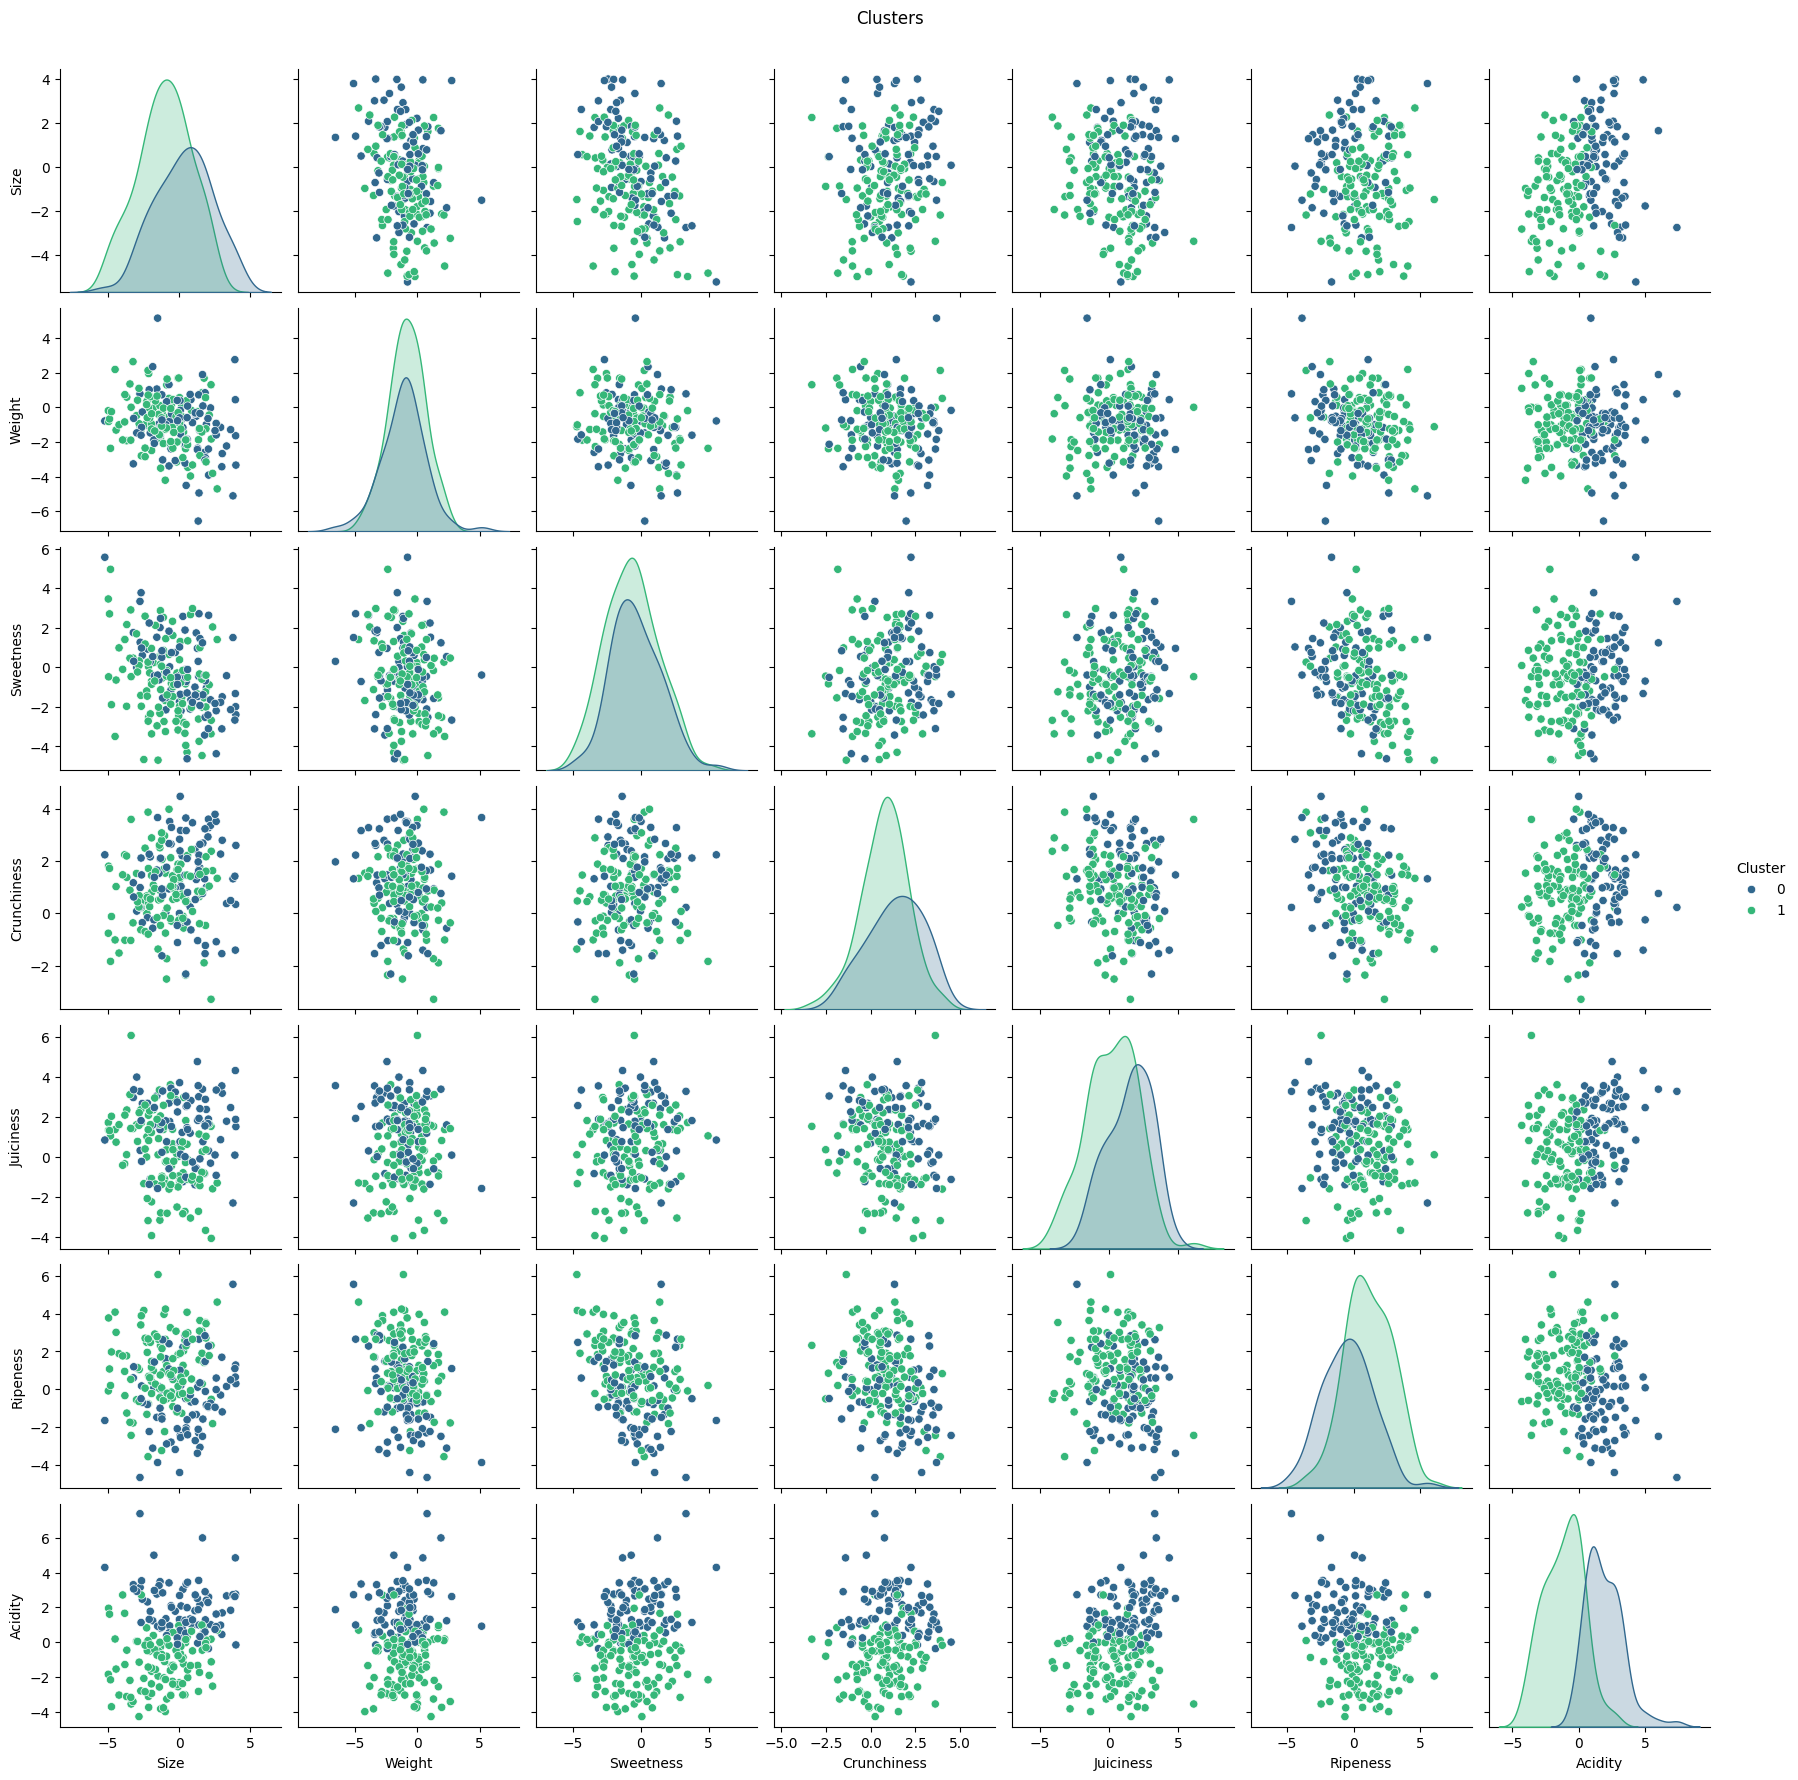

In [10]:
import seaborn as sns

xtest_df = pd.DataFrame(xtest)
pred_series = pd.Series(pred, index=xtest_df.index)
xtest_df['Cluster'] = pred_series

sns.pairplot(xtest_df, hue='Cluster', palette='viridis')
plt.suptitle('Clusters', y=1.02)

plt.show()

In [11]:
kmean = KMeans(n_clusters=2, n_init='auto')
kmean.fit(xtrain)

pred = kmean.predict(xtest)

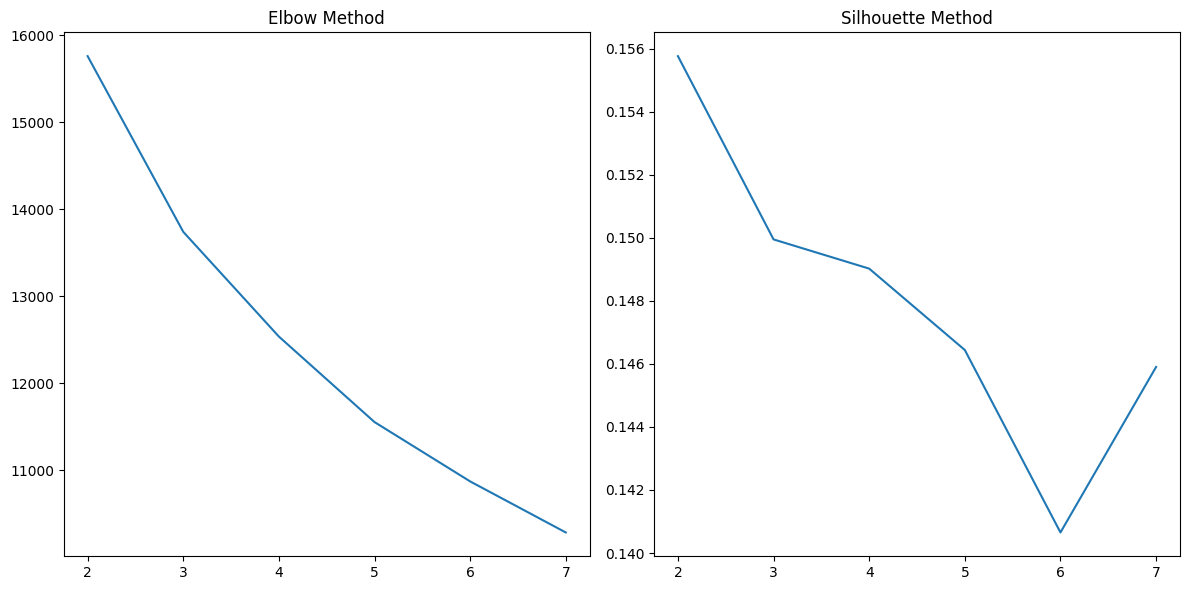

In [12]:
from sklearn.metrics import silhouette_score

inertia = []
silhouette = []

for i in range(2, 8):
    temp = KMeans(n_clusters=i, n_init='auto')
    temp.fit(xtrain)
    
    inertia.append(temp.inertia_)

    score =silhouette_score(xtrain, temp.labels_)
    silhouette.append(score)
    
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 8), inertia)
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(range(2, 8), silhouette)
plt.title('Silhouette Method')

# Show the plots
plt.tight_layout()
plt.show()

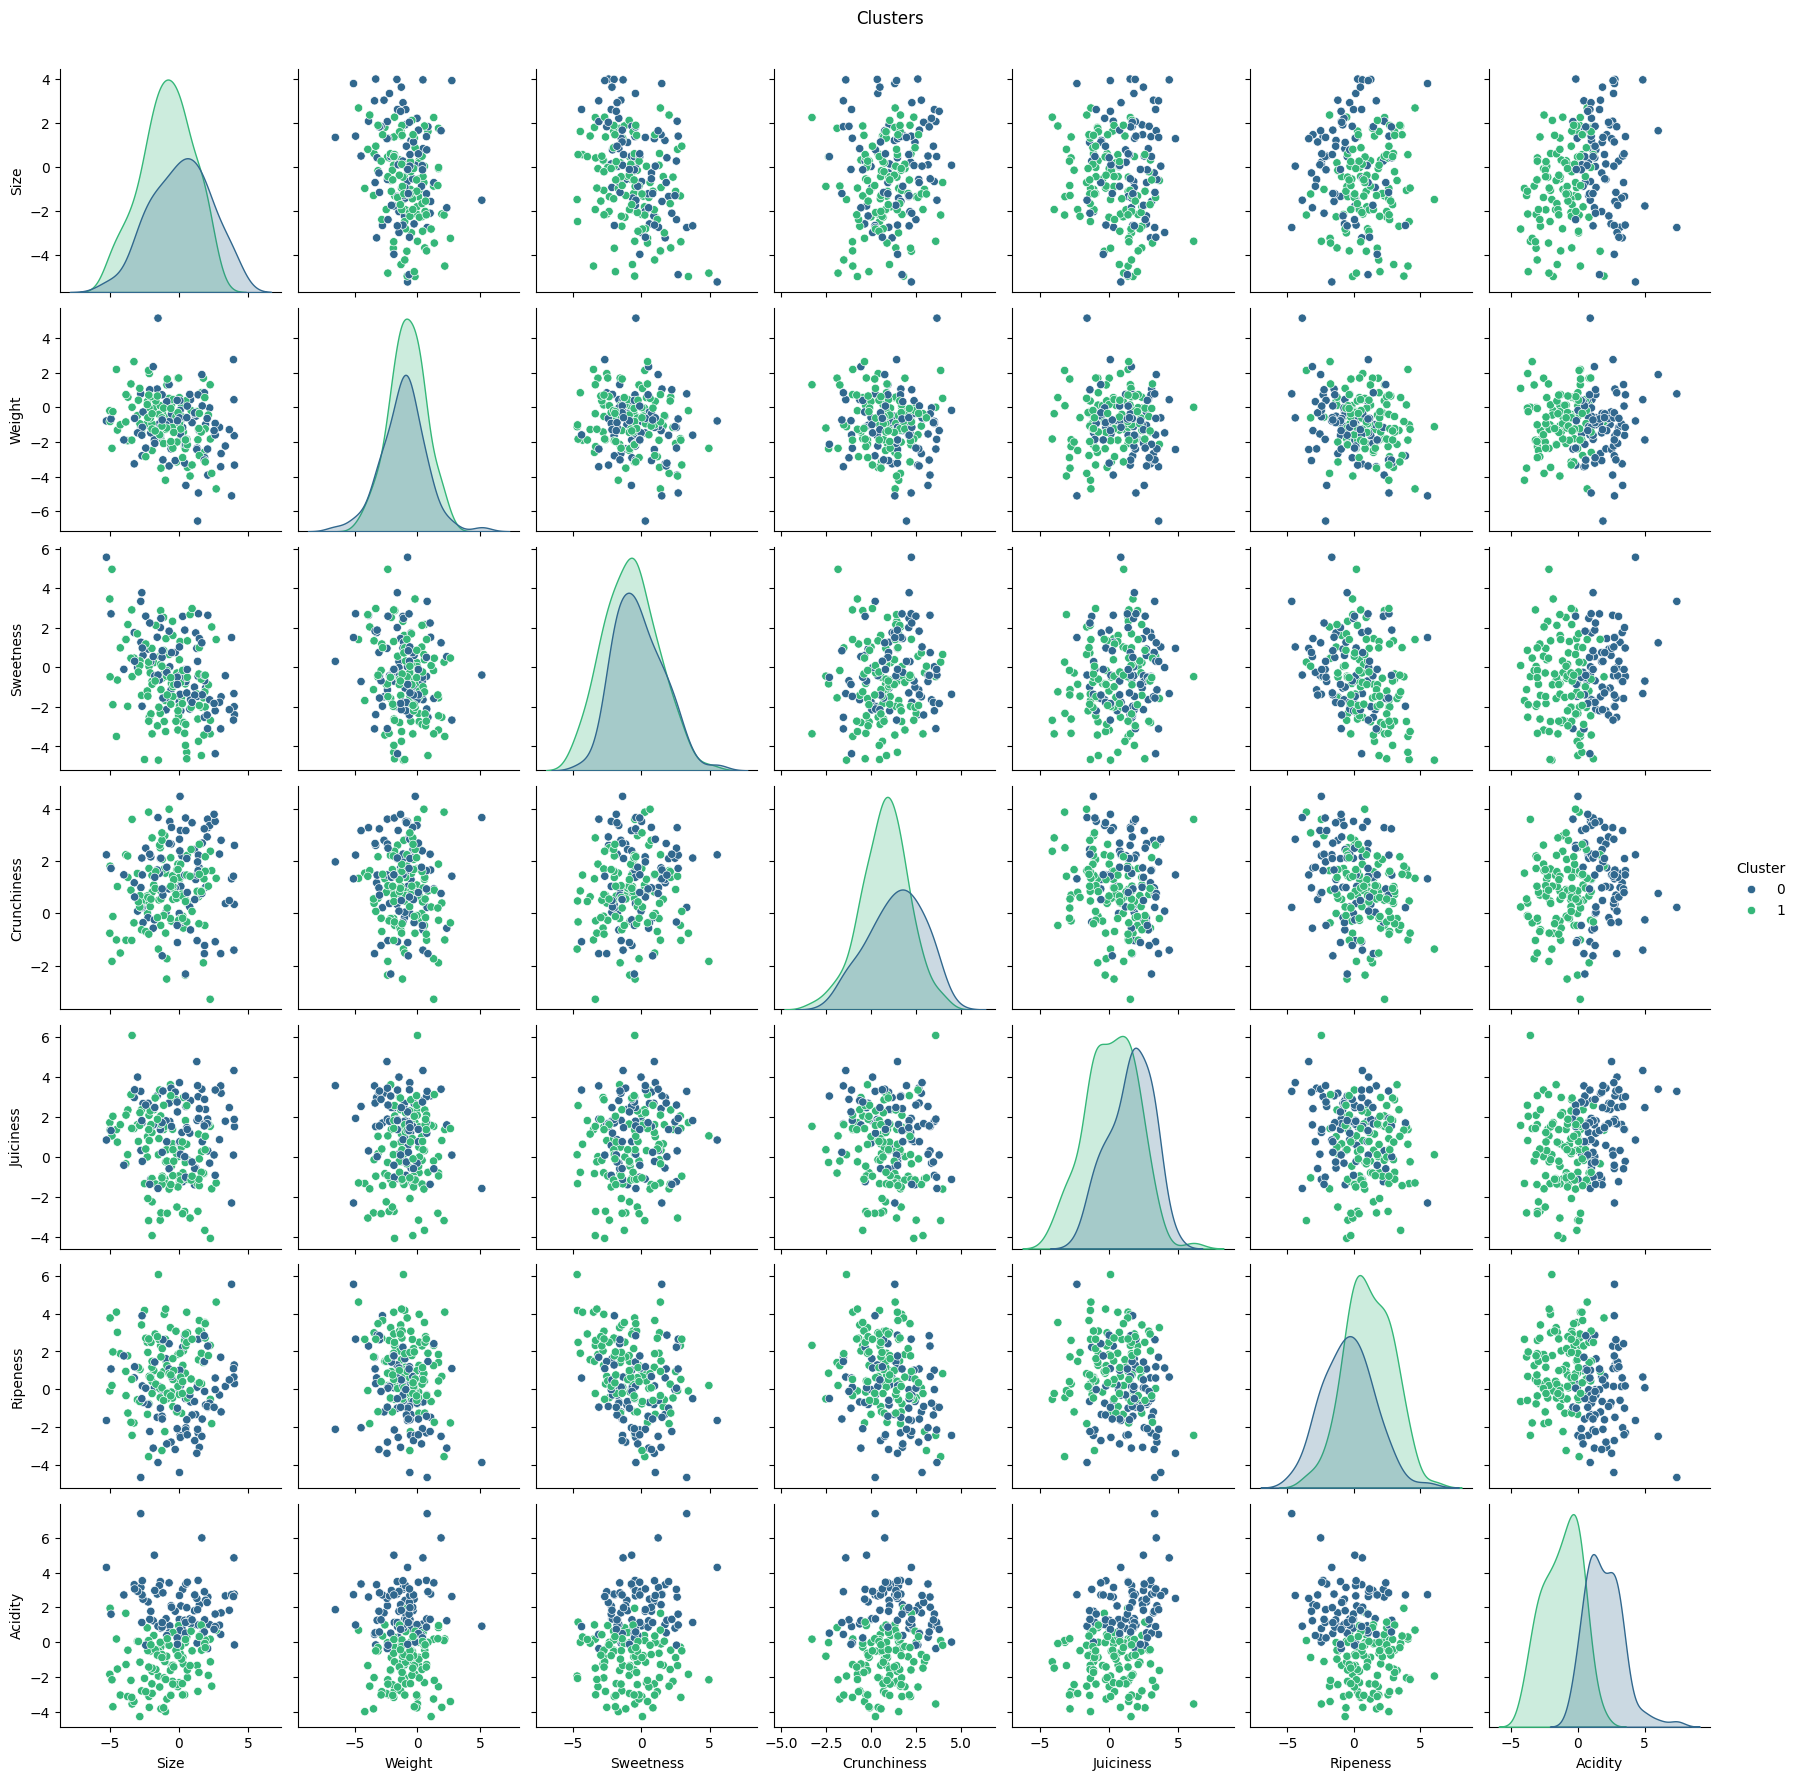

In [13]:
xtest_df = pd.DataFrame(xtest)
pred_series = pd.Series(pred, index=xtest_df.index)
xtest_df['Cluster'] = pred_series

sns.pairplot(xtest_df, hue='Cluster', palette='viridis')
plt.suptitle('Clusters', y=1.02)

plt.show()